In [63]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import glob
files=sorted(glob.glob('FitDataDir/2024-08-10/*.nc'))

print(files)
lonL=[]
latL=[]
timeL=[]
altL=[]
dist=[]
accum_altL=[]
distL=[]
speedL=[]
for f in sorted(files)[:]:
    with nc.Dataset(f) as ds:
        lon=ds.variables['lon'][:]
        lat=ds.variables['lat'][:]
        time=ds.variables['time'][:]
        alt=ds.variables['alt'][:]
        dist=ds.variables['dist'][:]
        speed=ds.variables['speed'][:]
        dalt=np.diff(alt)
        accum_alt=[0]
        dalt[dalt<0.1]=0
        accum_alt.extend(np.cumsum(dalt))
        lonL.extend(lon)
        latL.extend(lat)
        timeL.extend(time)
        altL.extend(alt)
        distL.extend(dist)
        speedL.extend(speed)
        accum_altL.extend(accum_alt)

lonL=np.array(lonL)
latL=np.array(latL)
lon_mean=np.mean(lonL)
lat_mean=np.mean(latL)
lon_std=np.std(lonL)
lat_std=np.std(latL)
lon_scaled=(lonL-lon_mean)/lon_std
lat_scaled=(latL-lat_mean)/lon_std


['FitDataDir/2024-08-10/garmin_data_2024-06-14 10:55:57.nc', 'FitDataDir/2024-08-10/garmin_data_2024-07-04 12:43:31.nc', 'FitDataDir/2024-08-10/garmin_data_2024-07-13 12:42:03.nc', 'FitDataDir/2024-08-10/garmin_data_2024-07-19 10:45:25.nc', 'FitDataDir/2024-08-10/garmin_data_2024-07-27 12:48:19.nc', 'FitDataDir/2024-08-10/garmin_data_2024-08-10 11:19:11.nc', 'FitDataDir/2024-08-10/garmin_data_2024-08-11 12:24:16.nc']


In [89]:
altL=np.array(altL)
timeL=np.array(timeL)
distL=np.array(distL)
speedL=np.array(speedL)
accum_altL=np.array(accum_altL)
X=np.column_stack((lonL,latL,altL,timeL,distL,accum_altL))
print(X.shape)
y=speedL
X_mean=np.mean(X,axis=0)
X_std=np.std(X,axis=0)
X_scaled=(X-X_mean)/X_std
n_records=X.shape[0]
X_train=X_scaled[:int(n_records*0.7)]
X_test=X_scaled[int(n_records*0.7):]
y_train=y[:int(n_records*0.7)]
timeL_test=timeL[int(n_records*0.7):]
timeL_train=timeL[:int(n_records*0.7)]
y_test=y[int(n_records*0.7):]

from sklearn.neighbors import KNeighborsRegressor
#import gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
a_train=np.nonzero(y_train>2)
knn=KNeighborsRegressor(n_neighbors=30,weights='distance')
knn.fit(X_train[a_train],y_train[a_train])
y_pred=knn.predict(X_test)
a=np.nonzero(y_test>2)
print(len(a[0]))
print(np.corrcoef(y_pred[a],y_test[a]))

(11971, 6)
3581
[[1.         0.60270565]
 [0.60270565 1.        ]]


Text(0.5, 1.0, 'KNN Regression\nCorrelation Coefficient: 0.60')

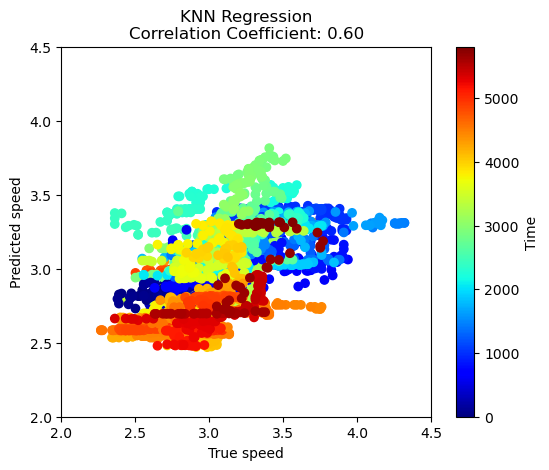

In [94]:
ax=plt.subplot(111)
plt.scatter(y_test[a],y_pred[a],c=timeL_test[a],cmap='jet')
ax.set_xlabel('True speed')
ax.set_ylabel('Predicted speed')
plt.colorbar(label='Time')
plt.xlim([2,4.5])
plt.ylim([2,4.5])
ax.set_aspect('equal')
plt.title('KNN Regression\nCorrelation Coefficient: %.2f'%np.corrcoef(y_pred[a],y_test[a])[0,1])

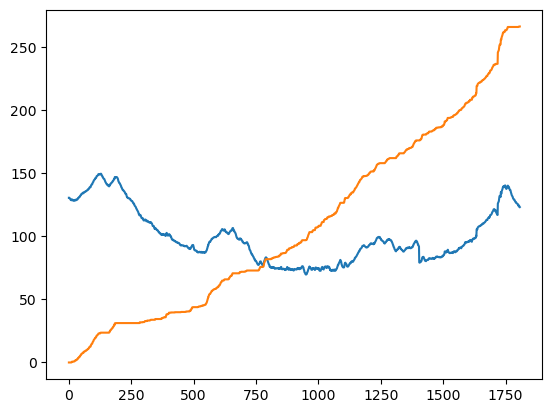

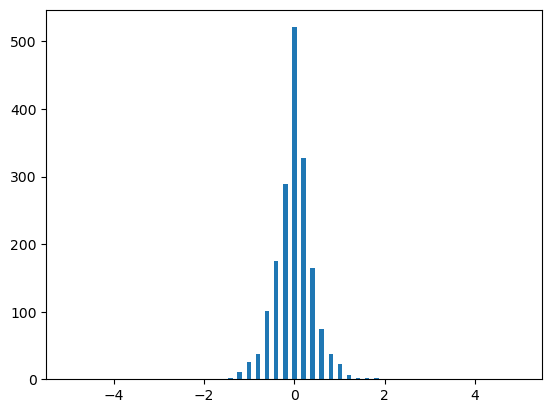

In [61]:
plt.plot(alt)
dalt=np.diff(alt)
#plt.plot(dalt)
accum_alt=[0]
dalt[dalt<0.1]=0
accum_alt.extend(np.cumsum(dalt))
plt.plot(accum_alt)
plt.figure()
dalt2=np.diff(alt)
h1=plt.hist(dalt2,bins=np.linspace(-5,5,100))

In [51]:
print(len(lonL))

11971


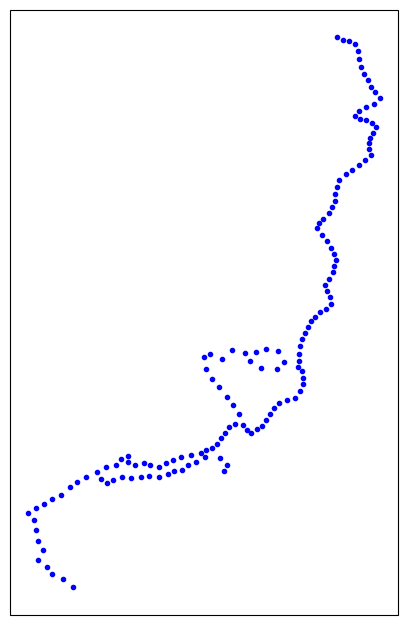

In [48]:

from sklearn.cluster import KMeans
X=np.vstack([lon_scaled,lat_scaled]).T
n_clusters=150
kmeans=KMeans(n_clusters=n_clusters,random_state=0).fit(X)
import cartopy.crs as ccrs
plt.figure(figsize=(5,10))
ax=plt.axes(projection=ccrs.PlateCarree())
dtL=[]
timeL=np.array(timeL)
lon_center=[]
lat_center=[]
for i in range(n_clusters):
    plt.plot(lonL[kmeans.labels_==i].mean(),latL[kmeans.labels_==i].mean(),'.',color='b')

[22, 4259, 2499, 5414, 1038, 3181, 1533, 4864, 3703, 1899, 23, 13, 4475, 25, 2222, 2818, 3942, 1294, 22, 5223, 2644, 14, 1729, 2997, 4649, 4117, 3449, 5555, 972, 27, 1155, 27, 2008, 5033, 27, 19, 2442, 1386, 3557, 3309, 4324, 2319, 3757, 5309, 2720, 38, 1601, 2060, 5658, 23, 3105, 20, 4818, 27, 1845, 3988, 2581, 22, 26, 20, 4598, 4774, 2884, 1201, 5125, 4217, 5482, 1460, 4963, 2762, 4377, 27, 3055, 1791, 3509, 5265, 1666, 2167, 3830, 25, 40, 31, 2381, 21, 1953, 4080, 1344, 5609, 4915, 3388, 32, 19, 3597, 4711, 4166, 19, 3881, 4539, 5003, 1248, 23, 5172, 5355, 26, 3242, 5078, 20, 3644, 1100, 4429, 27, 2109, 904, 22, 2537, 4033, 18, 5713, 2267, 2933]


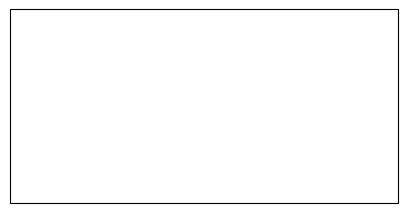

In [41]:
import cartopy.crs as ccrs
plt.figure(figsize=(5,10))
ax=plt.axes(projection=ccrs.PlateCarree())
dtL=[]
timeL=np.array(timeL)
lon_center=[]
lat_center=[]
for i in range(n_clusters):
    #plt.plot(lonL[kmeans.labels_==i].mean(),latL[kmeans.labels_==i].mean(),'.',color='b')
    time_cluster=timeL[kmeans.labels_==i]
    time_sorted=np.sort(time_cluster)
    n_time=len(time_sorted)
    t1=time_sorted[int(n_time*0.1)]
    t2=time_sorted[int(n_time*0.9)]
    dt=t2-t1
    lon_center.append(lonL[kmeans.labels_==i].mean())
    lat_center.append(latL[kmeans.labels_==i].mean())
    dtL.append(dt)
print(dtL)

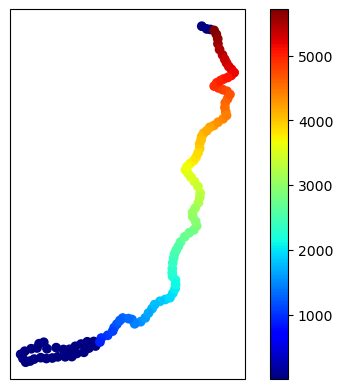

In [43]:
ax=plt.axes(projection=ccrs.PlateCarree())
img=plt.scatter(lon_center,lat_center,c=np.array(dtL),cmap='jet')
plt.colorbar(img)